In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '../../output/tests/gif_prev_work_comparison/SD/gif_stats.csv'
data = pd.read_csv(file_path)

# Display the first few rows and data info
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   prompt                            200 non-null    object 
 1   num_frames                        200 non-null    int64  
 2   batch_size                        200 non-null    int64  
 3   guidance                          200 non-null    float64
 4   ip_scale                          200 non-null    float64
 5   multi_prompt_strategy             200 non-null    object 
 6   intersection                      200 non-null    object 
 7   clip                              200 non-null    float64
 8   ms_ssim                           200 non-null    float64
 9   lpips                             200 non-null    float64
 10  temporal_consistency_loss         200 non-null    float64
 11  temporal_consistency_loss_warp    200 non-null    float64
 12  temporal

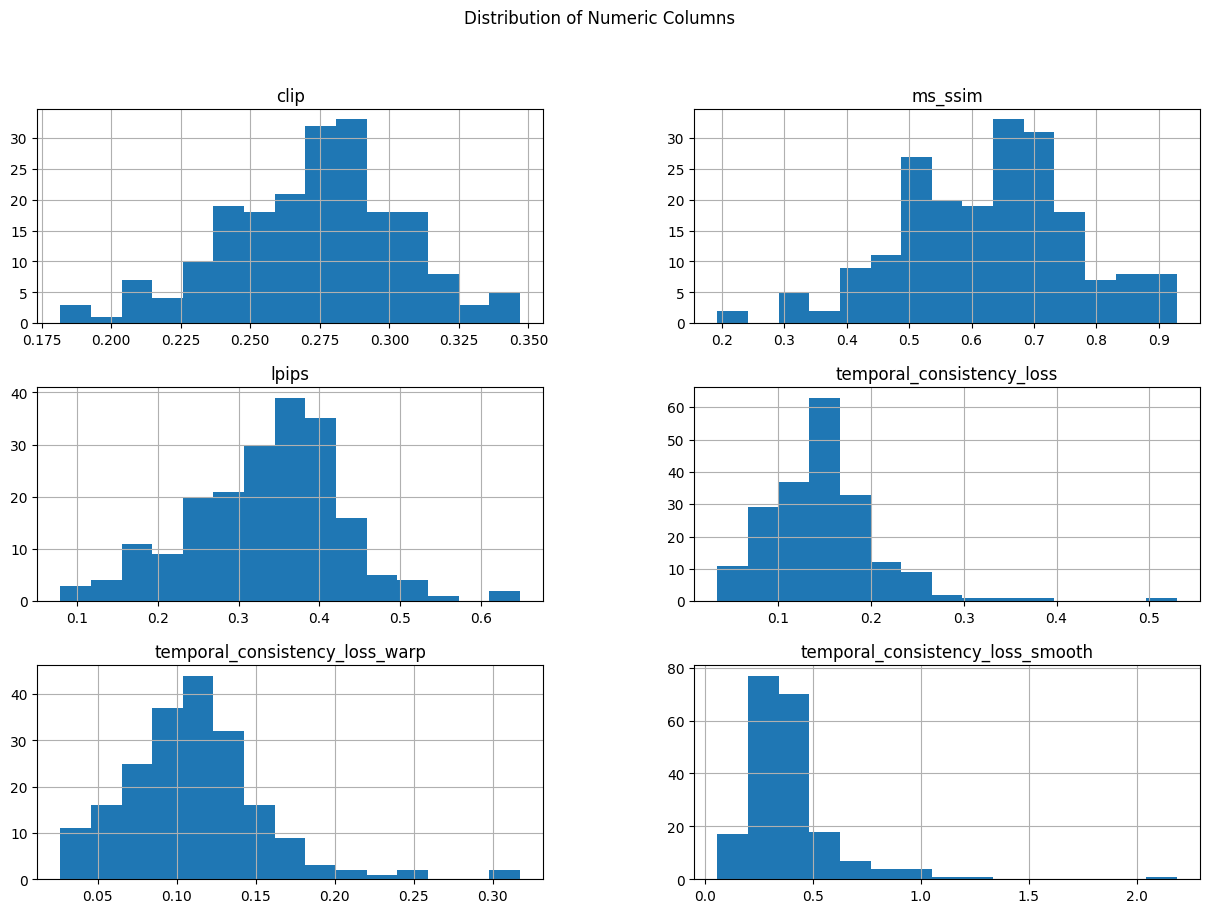

In [2]:
# Summary statistics
data.describe()

# Plot distributions of numeric columns
numeric_cols = ['clip', 'ms_ssim', 'lpips', 'temporal_consistency_loss', 'temporal_consistency_loss_warp', 'temporal_consistency_loss_smooth']
data[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Columns")
plt.show()

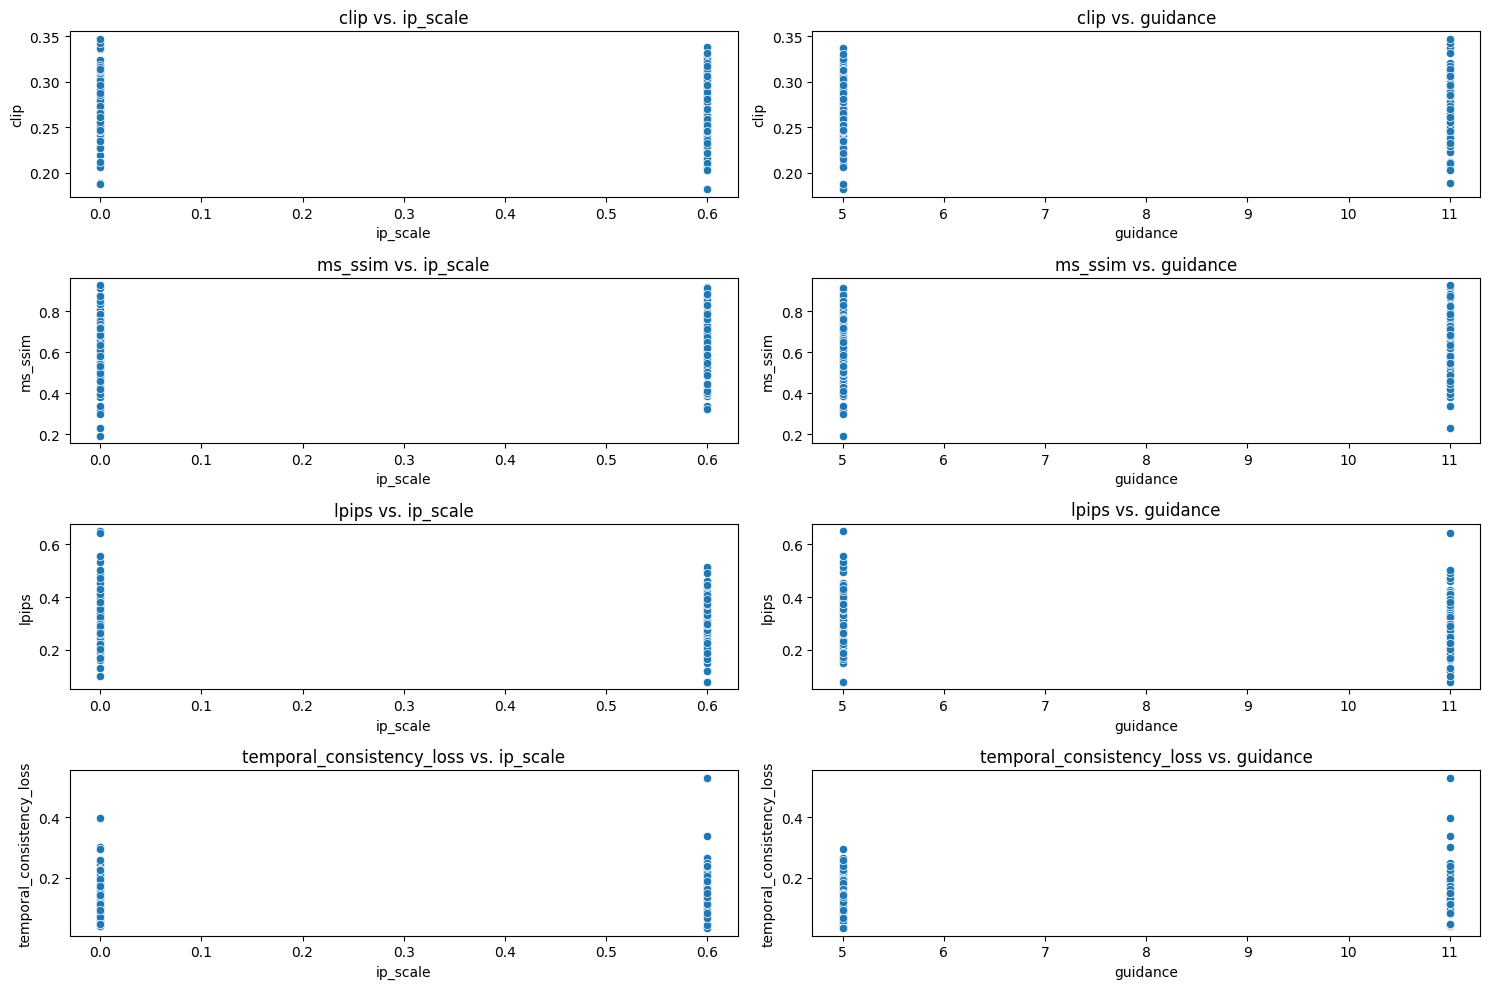

In [3]:
# Plot each metric against both parameters
metrics = ['clip', 'ms_ssim', 'lpips', 'temporal_consistency_loss']
params = ['ip_scale', 'guidance']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    # Plot metric vs ip_scale
    plt.subplot(4, 2, i*2 + 1)
    sns.scatterplot(data=data, x='ip_scale', y=metric)
    plt.title(f"{metric} vs. ip_scale")
    
    # Plot metric vs guidance
    plt.subplot(4, 2, i*2 + 2)
    sns.scatterplot(data=data, x='guidance', y=metric)
    plt.title(f"{metric} vs. guidance")

plt.tight_layout()
plt.show()

* clip a bit better without IP and with higher guidance
* Ms_ssim is better with higher ip_scale and guidance
* Lpips is better with ip_scale and higher guidance
* Temporal consistency loss is better with lower ip_scale and guidance



In [4]:
# ... existing code ...

# Create a new column for the model name
data['model_name'] = data.apply(lambda row: f"ours-ip{row['ip_scale']}-g{row['guidance']}", axis=1)

# Assuming 'prompt_name' is a column in your DataFrame, if not, replace it with the correct column name
# Select the relevant columns
model_data = data[['model_name', 'prompt', 'clip', 'ms_ssim', 'lpips', 'temporal_consistency_loss']]

# Display the new DataFrame
print(model_data)

# ... existing code ...

           model_name                                             prompt  \
0     ours-ip0.6-g5.0  A flower blooming from a bud to full bloom ove...   
1    ours-ip0.6-g11.0  A flower blooming from a bud to full bloom ove...   
2     ours-ip0.0-g5.0  A flower blooming from a bud to full bloom ove...   
3    ours-ip0.0-g11.0  A flower blooming from a bud to full bloom ove...   
4     ours-ip0.6-g5.0  A cat chasing a laser pointer dot across the r...   
..                ...                                                ...   
195  ours-ip0.0-g11.0                            An eye blinking slowly.   
196   ours-ip0.6-g5.0                     A paper crumpling into a ball.   
197  ours-ip0.6-g11.0                     A paper crumpling into a ball.   
198   ours-ip0.0-g5.0                     A paper crumpling into a ball.   
199  ours-ip0.0-g11.0                     A paper crumpling into a ball.   

         clip   ms_ssim     lpips  temporal_consistency_loss  
0    0.291520  0.661417 

In [5]:
# import other data

# Load the CSV file
file_path = '../../output/tests/gif_prev_work_comparison/DirecT2V/gif_stats.csv'
data_direct2video = pd.read_csv(file_path)

file_path = '../../output/tests/gif_prev_work_comparison/FreeBloom/gif_stats.csv'
data_freebloom = pd.read_csv(file_path)

file_path = '../../output/tests/gif_prev_work_comparison/T2VZero/gif_stats.csv'
data_t2vzero = pd.read_csv(file_path)

file_path = '../../output/tests/gif_prev_work_comparison/SDXL/gif_stats.csv'
data_sdxl = pd.read_csv(file_path)

file_path = '../../output/tests/gif_prev_work_comparison/SD3/gif_stats.csv'
data_sd3 = pd.read_csv(file_path)


In [6]:
# add previous models to model data



In [7]:
# Add model names to each dataset
data_direct2video['model_name'] = 'direct2video'
data_freebloom['model_name'] = 'freebloom'
data_t2vzero['model_name'] = 't2vzero'
data_sdxl['model_name'] = 'sdxl'
data_sd3['model_name'] = 'sd3'
# Select relevant columns
columns = ['model_name', 'prompt', 'clip', 'ms_ssim', 'lpips', 'temporal_consistency_loss']
model_data_direct2video = data_direct2video[columns]
model_data_freebloom = data_freebloom[columns]
model_data_t2vzero = data_t2vzero[columns]
model_data_sdxl = data_sdxl[columns]
model_data_sd3 = data_sd3[columns]

# Concatenate all model data
all_model_data = pd.concat([model_data, model_data_direct2video, model_data_freebloom, model_data_t2vzero, model_data_sdxl, model_data_sd3], ignore_index=True)

# Display the combined DataFrame
print(all_model_data)



           model_name                                             prompt  \
0     ours-ip0.6-g5.0  A flower blooming from a bud to full bloom ove...   
1    ours-ip0.6-g11.0  A flower blooming from a bud to full bloom ove...   
2     ours-ip0.0-g5.0  A flower blooming from a bud to full bloom ove...   
3    ours-ip0.0-g11.0  A flower blooming from a bud to full bloom ove...   
4     ours-ip0.6-g5.0  A cat chasing a laser pointer dot across the r...   
..                ...                                                ...   
452               sd3              A snake slithering through the grass.   
453               sd3          A paintbrush changing colors as it moves.   
454               sd3              A volcano erupting with lava flowing.   
455               sd3                            An eye blinking slowly.   
456               sd3                     A paper crumpling into a ball.   

         clip   ms_ssim     lpips  temporal_consistency_loss  
0    0.291520  0.661417 

In [8]:
# Calculate mean values for each metric grouped by model_name
metric_columns = ['clip', 'ms_ssim', 'lpips', 'temporal_consistency_loss']
avg_metrics = all_model_data.groupby('model_name')[metric_columns].mean()

# Display the average metrics
print("\nAverage metrics by model:")
print(avg_metrics)


Average metrics by model:
                      clip   ms_ssim     lpips  temporal_consistency_loss
model_name                                                               
direct2video      0.280808  0.487424  0.444837                   0.184315
freebloom         0.272428  0.673206  0.351262                   0.157662
ours-ip0.0-g11.0  0.277911  0.629711  0.330111                   0.152004
ours-ip0.0-g5.0   0.269536  0.589935  0.362503                   0.141094
ours-ip0.6-g11.0  0.270627  0.654780  0.316174                   0.157953
ours-ip0.6-g5.0   0.273084  0.630815  0.327781                   0.148625
sd3               0.276329  0.809861  0.184480                   0.086534
sdxl              0.271487  0.700728  0.279648                   0.137809
t2vzero           0.294018  0.428419  0.403735                   0.205849


In [9]:
# Step 1: Normalize each metric (0-1 scaling)
all_model_data['ms_ssim_norm'] = 1 - ((all_model_data['ms_ssim'] - all_model_data['ms_ssim'].min()) / (all_model_data['ms_ssim'].max() - all_model_data['ms_ssim'].min()))
all_model_data['lpips_norm'] = (all_model_data['lpips'] - all_model_data['lpips'].min()) / (all_model_data['lpips'].max() - all_model_data['lpips'].min())
all_model_data['temporal_consistency_loss_norm'] = (all_model_data['temporal_consistency_loss'] - all_model_data['temporal_consistency_loss'].min()) / (all_model_data['temporal_consistency_loss'].max() - all_model_data['temporal_consistency_loss'].min())

# Step 2: Compute combined normalized loss
all_model_data['combined_loss'] = all_model_data['ms_ssim_norm'] + all_model_data['lpips_norm'] + all_model_data['temporal_consistency_loss_norm']
    

In [10]:
# Calculate mean values and standard deviations for each metric grouped by model_name
metric_columns = ['clip', 'ms_ssim', 'lpips', 'temporal_consistency_loss', 'combined_loss']
avg_metrics = all_model_data.groupby('model_name')[metric_columns].agg(['mean', 'std'])

# Format the output with ± and 3 decimal places
formatted_metrics = pd.DataFrame(index=avg_metrics.index)
for metric in metric_columns:
    formatted_metrics[metric] = avg_metrics[metric]['mean'].round(3).astype(str) + ' ± ' + avg_metrics[metric]['std'].round(3).astype(str)

# Display the average metrics
print("\nAverage metrics by model:")
print(formatted_metrics)


Average metrics by model:
                           clip        ms_ssim          lpips  \
model_name                                                      
direct2video       0.281 ± 0.04  0.487 ± 0.134  0.445 ± 0.087   
freebloom         0.272 ± 0.024  0.673 ± 0.094  0.351 ± 0.082   
ours-ip0.0-g11.0   0.278 ± 0.03   0.63 ± 0.137     0.33 ± 0.1   
ours-ip0.0-g5.0    0.27 ± 0.031   0.59 ± 0.145  0.363 ± 0.094   
ours-ip0.6-g11.0  0.271 ± 0.034   0.655 ± 0.13  0.316 ± 0.089   
ours-ip0.6-g5.0   0.273 ± 0.032   0.631 ± 0.14  0.328 ± 0.092   
sd3               0.276 ± 0.028   0.81 ± 0.109   0.184 ± 0.08   
sdxl              0.271 ± 0.031  0.701 ± 0.089   0.28 ± 0.086   
t2vzero           0.294 ± 0.026  0.428 ± 0.174  0.404 ± 0.083   

                 temporal_consistency_loss  combined_loss  
model_name                                                 
direct2video                 0.184 ± 0.059  1.509 ± 0.366  
freebloom                    0.158 ± 0.039  1.093 ± 0.304  
ours-ip0.0-g11.0 